In [220]:
import numpy as np, pandas as pd, statsmodels as sm, seaborn as sms, matplotlib.pyplot as plt, sklearn.linear_model as sk, sys

from pandas import Series, DataFrame

from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error, mean_squared_log_error
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [221]:
sales_data_df = pd.read_csv("../data/sales_data_sample.csv", sep=",", encoding='Latin-1')

dropped_var = ['ADDRESSLINE1', 'ADDRESSLINE2', 'STATE', 'POSTALCODE', 'PHONE']

sales_data_df = sales_data_df.drop(dropped_var, axis=1)

sales_data_df

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,STATUS,QTR_ID,MONTH_ID,YEAR_ID,PRODUCTLINE,MSRP,PRODUCTCODE,CUSTOMERNAME,CITY,COUNTRY,TERRITORY,CONTACTLASTNAME,CONTACTFIRSTNAME,DEALSIZE
0,10107,30,95.70,2,2871.00,2/24/2003 0:00,Shipped,1,2,2003,Motorcycles,95,S10_1678,Land of Toys Inc.,NYC,USA,NaN,Yu,Kwai,Small
1,10121,34,81.35,5,2765.90,5/7/2003 0:00,Shipped,2,5,2003,Motorcycles,95,S10_1678,Reims Collectables,Reims,France,EMEA,Henriot,Paul,Small
2,10134,41,94.74,2,3884.34,7/1/2003 0:00,Shipped,3,7,2003,Motorcycles,95,S10_1678,Lyon Souveniers,Paris,France,EMEA,Da Cunha,Daniel,Medium
3,10145,45,83.26,6,3746.70,8/25/2003 0:00,Shipped,3,8,2003,Motorcycles,95,S10_1678,Toys4GrownUps.com,Pasadena,USA,NaN,Young,Julie,Medium
4,10159,49,100.00,14,5205.27,10/10/2003 0:00,Shipped,4,10,2003,Motorcycles,95,S10_1678,Corporate Gift Ideas Co.,San Francisco,USA,NaN,Brown,Julie,Medium
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2818,10350,20,100.00,15,2244.40,12/2/2004 0:00,Shipped,4,12,2004,Ships,54,S72_3212,Euro Shopping Channel,Madrid,Spain,EMEA,Freyre,Diego,Small
2819,10373,29,100.00,1,3978.51,1/31/2005 0:00,Shipped,1,1,2005,Ships,54,S72_3212,"Oulu Toy Supplies, Inc.",Oulu,Finland,EMEA,Koskitalo,Pirkko,Medium
2820,10386,43,100.00,4,5417.57,3/1/2005 0:00,Resolved,1,3,2005,Ships,54,S72_3212,Euro Shopping Channel,Madrid,Spain,EMEA,Freyre,Diego,Medium
2821,10397,34,62.24,1,2116.16,3/28/2005 0:00,Shipped,1,3,2005,Ships,54,S72_3212,Alpha Cognac,Toulouse,France,EMEA,Roulet,Annette,Small


In [222]:
sales_data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2823 entries, 0 to 2822
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ORDERNUMBER       2823 non-null   int64  
 1   QUANTITYORDERED   2823 non-null   int64  
 2   PRICEEACH         2823 non-null   float64
 3   ORDERLINENUMBER   2823 non-null   int64  
 4   SALES             2823 non-null   float64
 5   ORDERDATE         2823 non-null   object 
 6   STATUS            2823 non-null   object 
 7   QTR_ID            2823 non-null   int64  
 8   MONTH_ID          2823 non-null   int64  
 9   YEAR_ID           2823 non-null   int64  
 10  PRODUCTLINE       2823 non-null   object 
 11  MSRP              2823 non-null   int64  
 12  PRODUCTCODE       2823 non-null   object 
 13  CUSTOMERNAME      2823 non-null   object 
 14  CITY              2823 non-null   object 
 15  COUNTRY           2823 non-null   object 
 16  TERRITORY         1749 non-null   object 


In [223]:
basic_statistics = sales_data_df.describe()

basic_statistics

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,QTR_ID,MONTH_ID,YEAR_ID,MSRP
count,2823.000000,2823.000000,2823.000000,2823.000000,2823.000000,2823.000000,2823.000000,2823.00000,2823.000000
mean,10258.725115,35.092809,83.658544,6.466171,3553.889072,2.717676,7.092455,2003.81509,100.715551
std,92.085478,9.741443,20.174277,4.225841,1841.865106,1.203878,3.656633,0.69967,40.187912
min,10100.000000,6.000000,26.880000,1.000000,482.130000,1.000000,1.000000,2003.00000,33.000000
25%,10180.000000,27.000000,68.860000,3.000000,2203.430000,2.000000,4.000000,2003.00000,68.000000
50%,10262.000000,35.000000,95.700000,6.000000,3184.800000,3.000000,8.000000,2004.00000,99.000000
75%,10333.500000,43.000000,100.000000,9.000000,4508.000000,4.000000,11.000000,2004.00000,124.000000
max,10425.000000,97.000000,100.000000,18.000000,14082.800000,4.000000,12.000000,2005.00000,214.000000


In [224]:
# Highest order quantity amount

all_order_quant = sales_data_df['QUANTITYORDERED']

max_quantity_index = np.argmax(all_order_quant.values)

max_quantity = all_order_quant[max_quantity_index]

max_quantity_date = sales_data_df.loc[max_quantity_index]['ORDERDATE']

max_quantity_fname, max_quantity_lname = sales_data_df.loc[max_quantity_index, ['CONTACTFIRSTNAME', 'CONTACTLASTNAME']].values

print(f"Highest order quantity: {max_quantity}, occurs on {max_quantity_date} by {max_quantity_fname} {max_quantity_lname}")

Highest order quantity: 97, occurs on 4/14/2005 0:00 by Frederique Citeaux


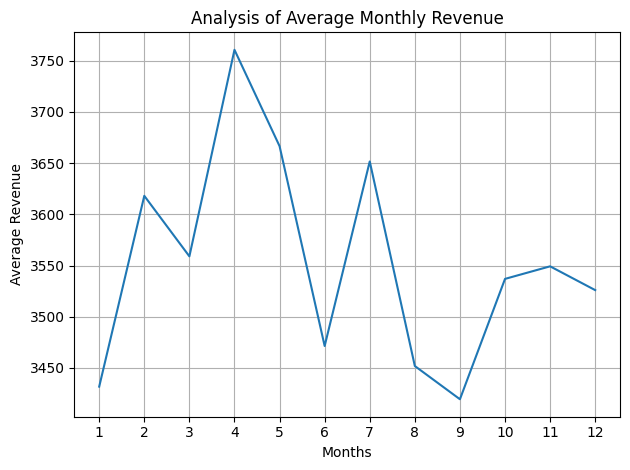

Two significant spikes occured in the average revenue per month. 

These included:
- April: Revenue reached an all-time high of 3760.62
- July: Revenue reached a secondary peak of 3651.6

It's also important to note that a sharp decline is followed after both spikes.
- The revenue declined from 3760.62 in April to 3471.43 in June, which is a difference of 289.2 revenue
or a percentage difference of 7.69%
- The revenue declined from 3651.6 in July to 3419.44 in September, which is a difference of 232.16 revenue
or a percentage difference of 6.36%

The spikes can be explained by... 


In [225]:
# Analysis of average monthly revenue

monthly_revenue = sales_data_df[['SALES', 'MONTH_ID']].sort_values('MONTH_ID')

avg_monthly_revenue = monthly_revenue.groupby('MONTH_ID')['SALES'].mean()

months, revenue = avg_monthly_revenue.index, avg_monthly_revenue.values

def percentage_difference(month1, month2):
        return np.round(np.abs(month1-month2)/month1 * 100, 2)

def numerical_difference(month1, month2):
    return np.round(np.abs(month1-month2), 2)

graph_filename = "line_avg_monthly_revenue"
plt.plot(months, revenue)
plt.xlabel('Months')
plt.ylabel('Average Revenue')
plt.title('Analysis of Average Monthly Revenue')
plt.grid(True)
plt.xticks(np.arange(min(months), max(months)+1, 1.0))
plt.tight_layout()
plt.savefig(f"../results/{graph_filename}")
plt.show()

print(f"""Two significant spikes occured in the average revenue per month. 

These included:
- April: Revenue reached an all-time high of {np.round(revenue[3], 2)}
- July: Revenue reached a secondary peak of {np.round(revenue[6], 2)}\n""")

print(f"""It's also important to note that a sharp decline is followed after both spikes.
- The revenue declined from {np.round(revenue[3], 2)} in April to {np.round(revenue[5], 2)} in June, which is a difference of {numerical_difference(revenue[3], revenue[5])} revenue
or a percentage difference of {percentage_difference(revenue[3], revenue[5])}%
- The revenue declined from {np.round(revenue[6], 2)} in July to {np.round(revenue[8], 2)} in September, which is a difference of {numerical_difference(revenue[6], revenue[8])} revenue
or a percentage difference of {percentage_difference(revenue[6], revenue[8])}%\n""")

print("The spikes can be explained by... ")



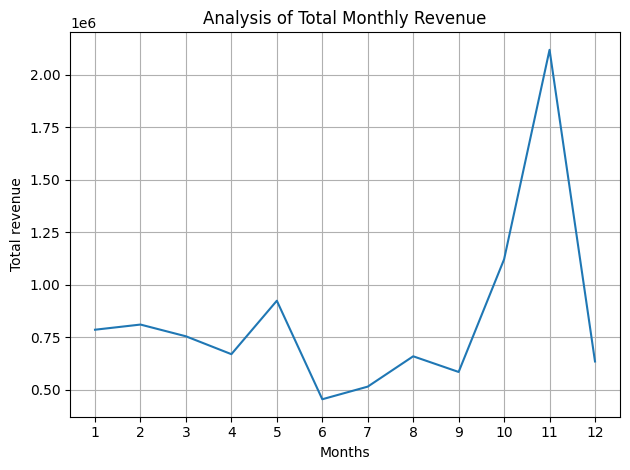

One significant spike occurred in the total revenue per month. 

- November: Revenue reached an all-time high of 2118885.67

The spike in total revenue from September to November can be explained by the holiday shopping effect. 
This is a period where consumerism is at its peak with heavy advertising and marketing due to holidays.

It's also important to note that a sharp decline is followed after the spike heading into December.
- The revenue declined from 2118885.67 in November to 634679.12 in December, which is a difference of 1484206.55 revenue
or a percentage difference of 70.05%

The sudden decline in total revenue after November would also contribute and further emphasise the likilihood of the holiday shopping effect.
As this is when the holidays begin to take place and therefore shopping will dramatically decrease.


In [226]:
# Analysis of total monthly revenue

total_monthly_revenue = monthly_revenue.groupby('MONTH_ID')['SALES'].sum()

months, revenue = total_monthly_revenue.index, total_monthly_revenue.values

graph_filename = "line_total_monthly_revenue.png"
plt.plot(months, revenue)
plt.xlabel('Months')
plt.ylabel('Total revenue')
plt.title('Analysis of Total Monthly Revenue')
plt.grid(True)
plt.xticks(np.arange(min(months), max(months)+1, 1.0))
plt.tight_layout()
plt.savefig(f"../results/{graph_filename}")
plt.show()

print(f"""One significant spike occurred in the total revenue per month. 

- November: Revenue reached an all-time high of {np.round(revenue[10], 2)}\n""")

print("""The spike in total revenue from September to November can be explained by the holiday shopping effect. 
This is a period where consumerism is at its peak with heavy advertising and marketing due to holidays.\n""")

print(f"""It's also important to note that a sharp decline is followed after the spike heading into December.
- The revenue declined from {np.round(revenue[10], 2)} in November to {np.round(revenue[11], 2)} in December, which is a difference of {numerical_difference(revenue[10], revenue[11])} revenue
or a percentage difference of {percentage_difference(revenue[10], revenue[11])}%\n""")

print("""The sudden decline in total revenue after November would also contribute and further emphasise the likilihood of the holiday shopping effect.
As this is when the holidays begin to take place and therefore shopping will dramatically decrease.""")

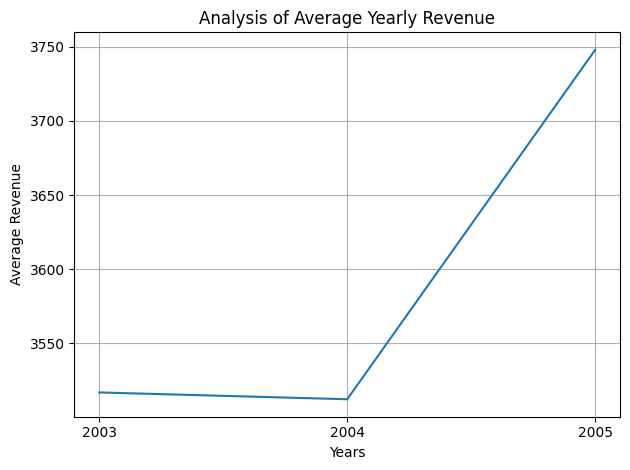

Between 2003 and 2004, the average revenue slightly decreased from 3516.98 to 3512.39 which is a difference of 4.59 revenue
or a percentage difference of 0.13%

Between 2004 and 2005, the average revenue drastically increased from 3512.39 to 3747.88 which is a difference of 235.49 revenue
or a percentage difference of 6.7%



In [227]:
# revenue trend to analyse average yearly revenue

yearly_revenue = sales_data_df[['SALES', 'YEAR_ID']].sort_values('YEAR_ID')

avg_yearly_revenue = yearly_revenue.groupby('YEAR_ID')['SALES'].mean()

years, revenue = avg_yearly_revenue.index, avg_yearly_revenue.values

graph_filename = "line_avg_yearly_revenue.png"
plt.plot(years, revenue)
plt.xlabel('Years')
plt.ylabel('Average Revenue')
plt.title('Analysis of Average Yearly Revenue')
plt.grid(True)
plt.xticks(np.arange(min(years), max(years)+1, 1.0))
plt.tight_layout()
plt.savefig(f"../results/{graph_filename}")
plt.show()

print(f"""Between 2003 and 2004, the average revenue slightly decreased from {np.round(revenue[0], 2)} to {np.round(revenue[1], 2)} which is a difference of {numerical_difference(revenue[0], revenue[1])} revenue
or a percentage difference of {percentage_difference(revenue[0], revenue[1])}%\n""")

print(f"""Between 2004 and 2005, the average revenue drastically increased from {np.round(revenue[1], 2)} to {np.round(revenue[2], 2)} which is a difference of {numerical_difference(revenue[1], revenue[2])} revenue
or a percentage difference of {percentage_difference(revenue[1], revenue[2])}%\n""")

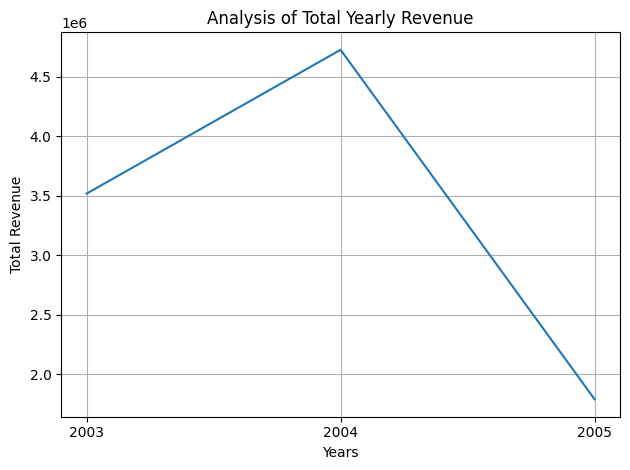

Between 2003 and 2004, the total revenue increased from 3516979.54 to 4724162.6 which is a difference of 1207183.06 revenue
or a percentage difference of 34.32%

Between 2004 and 2005, the total revenue drastically decreased from 4724162.6 to 1791486.71 which is a difference of 2932675.89 revenue
or a percentage difference of 62.08%



In [228]:
# revenue trend to analyse total yearly revenue

total_yearly_revenue = yearly_revenue.groupby('YEAR_ID')['SALES'].sum()

years, revenue = total_yearly_revenue.index, total_yearly_revenue.values

graph_filename = "line_total_yearly_revenue.png"
plt.plot(years, revenue)
plt.xlabel('Years')
plt.ylabel('Total Revenue')
plt.title('Analysis of Total Yearly Revenue')
plt.grid(True)
plt.xticks(np.arange(min(years), max(years)+1, 1.0))
plt.tight_layout()
plt.savefig(f"../results/{graph_filename}")
plt.show()

print(f"""Between 2003 and 2004, the total revenue increased from {np.round(revenue[0], 2)} to {np.round(revenue[1], 2)} which is a difference of {numerical_difference(revenue[0], revenue[1])} revenue
or a percentage difference of {percentage_difference(revenue[0], revenue[1])}%\n""")

print(f"""Between 2004 and 2005, the total revenue drastically decreased from {np.round(revenue[1], 2)} to {np.round(revenue[2], 2)} which is a difference of {numerical_difference(revenue[1], revenue[2])} revenue
or a percentage difference of {percentage_difference(revenue[1], revenue[2])}%\n""")

In [229]:
print("""Situation: Average revenue per year increased while total revenue per year decreased.

Hypothesis: Less orders, more products.

Potential Causes:

- Decreased Product Variation (niche-market over mass-market)
- Product Differentiation (Expensive products over cheap products)

How to test:

- Analysis of products offered in 2003 vs 2005""")

Situation: Average revenue per year increased while total revenue per year decreased.

Hypothesis: Less orders, more products.

Potential Causes:

- Decreased Product Variation (niche-market over mass-market)
- Product Differentiation (Expensive products over cheap products)

How to test:

- Analysis of products offered in 2003 vs 2005


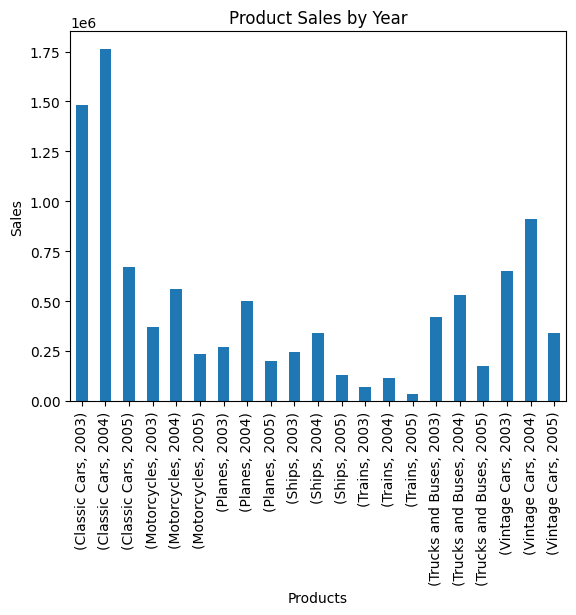

In [230]:
# Analysis of products offered in 2003 to 2005

yearly_product_sales = sales_data_df.groupby(['PRODUCTLINE', 'YEAR_ID'])['SALES'].sum()

yearly_product_sales.plot(kind='bar')

graph_filename = "bar_yearly_product_sales.png"
plt.xlabel('Products')
plt.ylabel('Sales')
plt.title('Product Sales by Year')
plt.savefig(f"../results/{graph_filename}")
plt.show()


In [ ]:
# Analysis of most signficant difference in products offered between 2003 and 2005



In [231]:
# Analysis on the revenue per country (most, min, range, mean, median)

revenue_per_country = sales_data_df.groupby('COUNTRY')['SALES'].sum().sort_values()

revenue_per_city = sales_data_df.groupby('CITY')['SALES'].sum().sort_values()

most_city, most_city_revenue = revenue_per_city.index[-1], revenue_per_city.values[-1]

least_city, least_city_revenue = revenue_per_city.index[0], revenue_per_city.values[0]

most_country, most_country_revenue = revenue_per_country.index[-1], revenue_per_country.values[-1]

least_country, least_country_revenue = revenue_per_country.index[0], revenue_per_country.values[0]

print(f"""The country with the most revenue is {most_country} which has {most_country_revenue} revenue.
The country with the least revenue is {least_country} which has {least_country_revenue} revenue.
The city with the most revenue is {most_city} which has {most_city_revenue} revenue.
The city with the least revenue is {least_city} which has {least_city_revenue} revenue.\n
Range of revenue is {most_country_revenue-least_country_revenue}.
Mean revenue is {np.round(revenue_per_country.values.mean(), 2)}.
Median revenue is {np.round(np.median(revenue_per_country.values), 2)}""")


The country with the most revenue is USA which has 3627982.83 revenue.
The country with the least revenue is Ireland which has 57756.43 revenue.
The city with the most revenue is Madrid which has 1082551.44 revenue.
The city with the least revenue is Charleroi which has 33440.1 revenue.

Range of revenue is 3570226.4.
Mean revenue is 528033.1.
Median revenue is 245637.15


In [232]:
# Analysis on the standard deviation of the MSRP (Manufacturer's Suggested Retail Price) and the actual price.

all_items = sales_data_df[['PRICEEACH', 'MSRP']]

all_items_diff = np.abs(all_items['PRICEEACH'].values - all_items['MSRP'].values)

mean_price_diff = np.mean(all_items_diff)

print(f"""The mean difference between the price of an item and its MSRP is: {mean_price_diff}""")


The mean difference between the price of an item and its MSRP is: 23.2967941905774


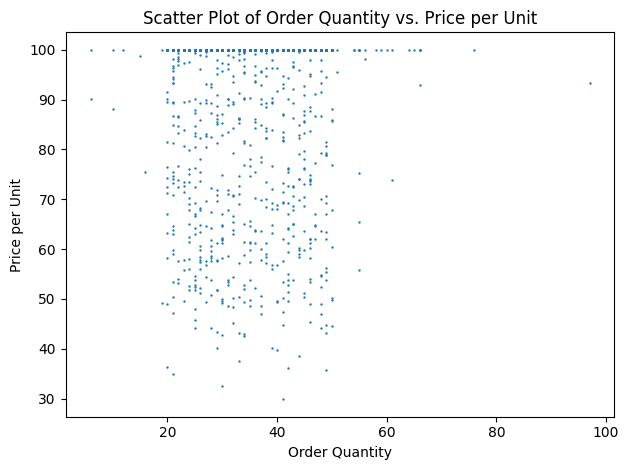

Mean Squared Error (MSE): 620.3242246589607
R-squared: -0.3616766453103837
MSE Percentage: 10.395346689259378
Coefficient: 0.049474919763945135
Intercept: 88.32973279695172



In [233]:
variables = sales_data_df[['PRICEEACH', 'QUANTITYORDERED']]

X = variables['QUANTITYORDERED'].values
Y = variables['PRICEEACH'].values

np.random.seed(42)

orders_length = len(X) // 2

X_train, X_test = X[:orders_length], X[orders_length+1:]
Y_train, Y_test = Y[:orders_length], Y[orders_length+1:]

graph_filename = 'scatter_quantity_price.png'
plt.scatter(X_train, Y_train, s=0.5)
plt.xlabel("Order Quantity")
plt.ylabel("Price per Unit")
plt.title('Scatter Plot of Order Quantity vs. Price per Unit')
plt.tight_layout()
plt.savefig(f"../results/{graph_filename}")
plt.show()

regression_model = LinearRegression()
regression_model.fit(X_train.reshape(-1, 1), Y_train)

coefficient = regression_model.coef_
intercept = regression_model.intercept_

Y_pred_test= regression_model.predict(X_test.reshape(-1, 1))

# Calculate evaluation metrics on the test set
mse = mean_squared_error(Y_test, Y_pred_test)
r_squared = r2_score(Y_test, Y_pred_test)

# Calculate the mean of the dependent variable
mean_y = np.mean(Y_test)

# Calculate the MSE
mse = mean_squared_error(Y_test, Y_pred_test)

# Calculate the percentage between MSE and mean
mse_percentage = mse / (mean_y**2) * 100

# Print the result
print(f"""Mean Squared Error (MSE): {mse}
R-squared: {r_squared}
MSE Percentage: {mse_percentage}
Coefficient: {coefficient[0]}
Intercept: {intercept}\n""")